<a href="https://colab.research.google.com/github/Urooj112233/Task-1-of-Data-Science-internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

In [ ]:
#step 1: Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Step 2: Data Loading
# Read the CSV file
df = pd.read_csv("/content/Airbnb.csv")

# Display the first few rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [ ]:
#display last few rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#sanity check of the data
#shape of data means rows and columns
df.shape


(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#step 3: Data Cleaning
#find the missing values
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
#finding percentge of the missing value
#if the percentage of missing value exceeds 50% then we will delete that column
df.isnull().mean()*100

,0
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Identify outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]
    # Apply to numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, col)

In [ ]:
#garbage value(always in the form of object data type)
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)


name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Cozy Bedroom- Beautiful, Historical Location           1
Bright Room w/ a Brilliant Manhattan View              1
Name: count, Length: 47896, dtype: int64
******************************
host_name
Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Pujan              1
Raheem             1
Rusaa              1
Erin At Bedly      1
Brad & Rachel      1
Name: count, Length: 11452, dtype: int64
**************

In [ ]:
#EDA
#descriptive statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.describe(include="object")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23/06/2019
freq,18,417,21661,3920,25409,1413


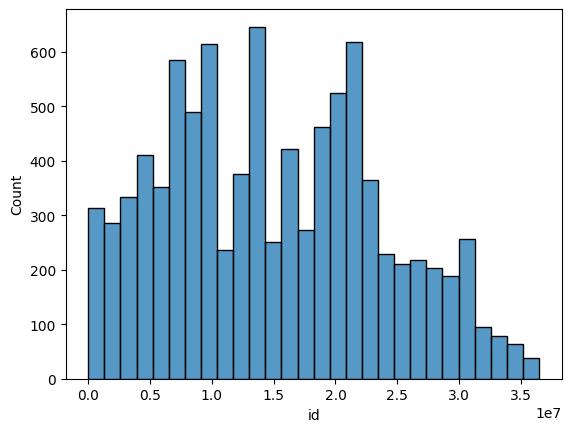

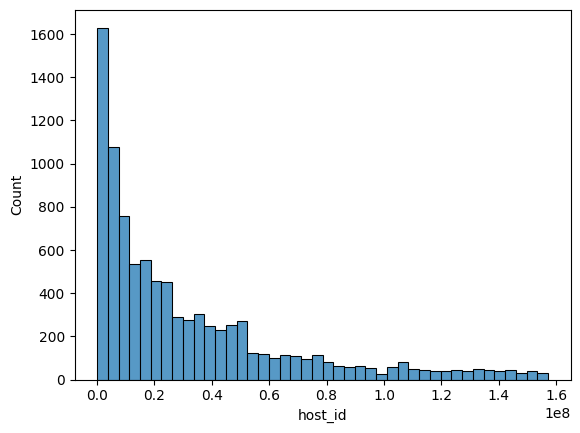

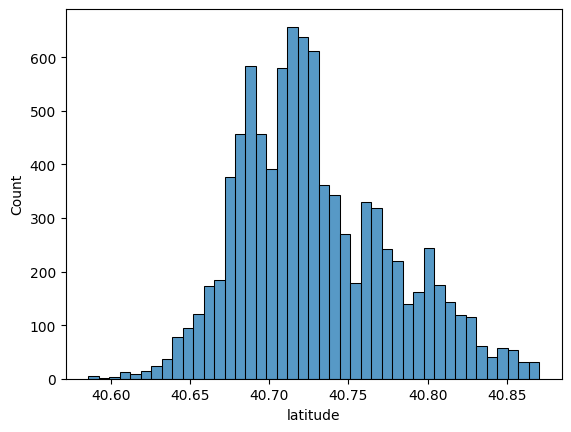

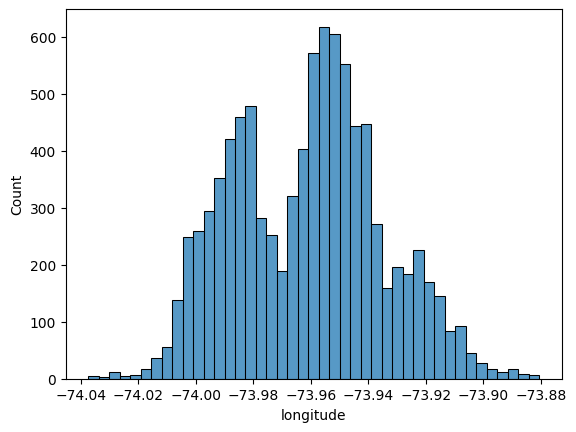

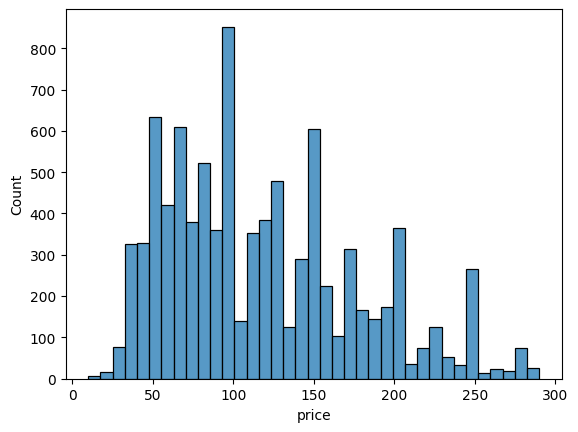

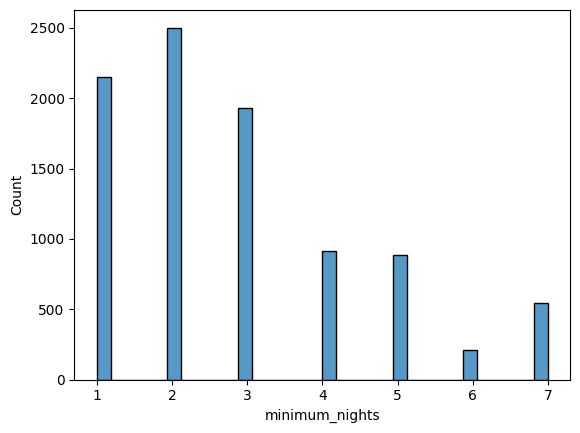

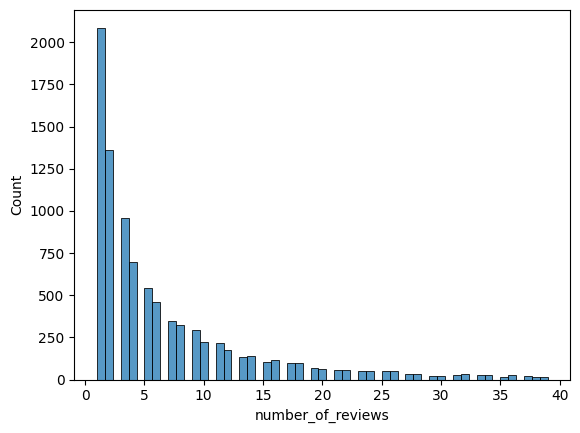

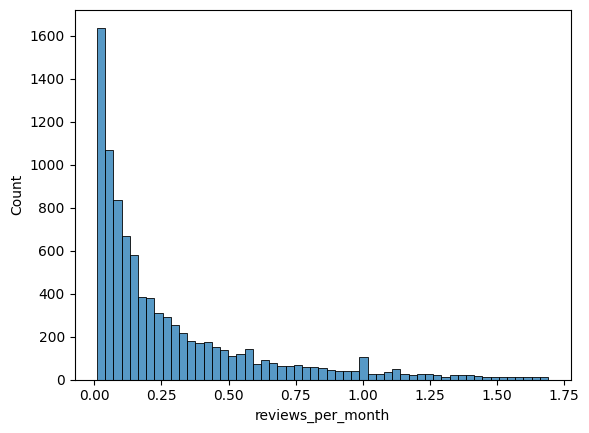

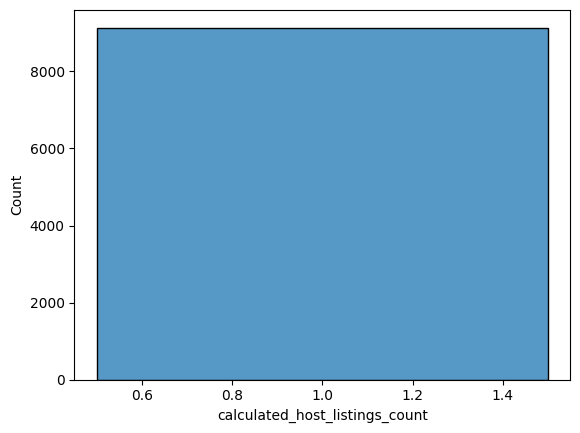

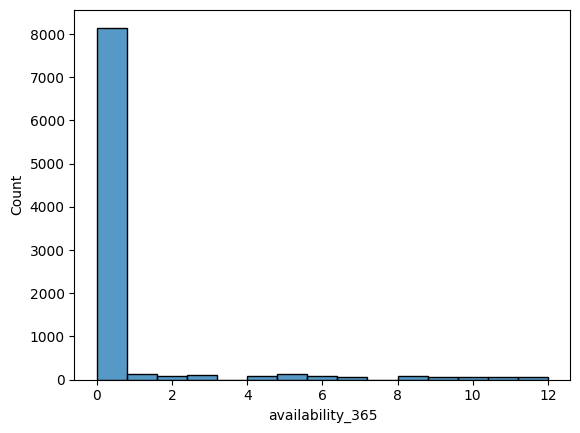

In [ ]:
#STEP 4: DATA VISUALIZATION
#Histogram for numeric distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [ ]:
#Correlation Heat map for numeric features
s=df.select_dtypes(include="number").corr()

<Axes: >

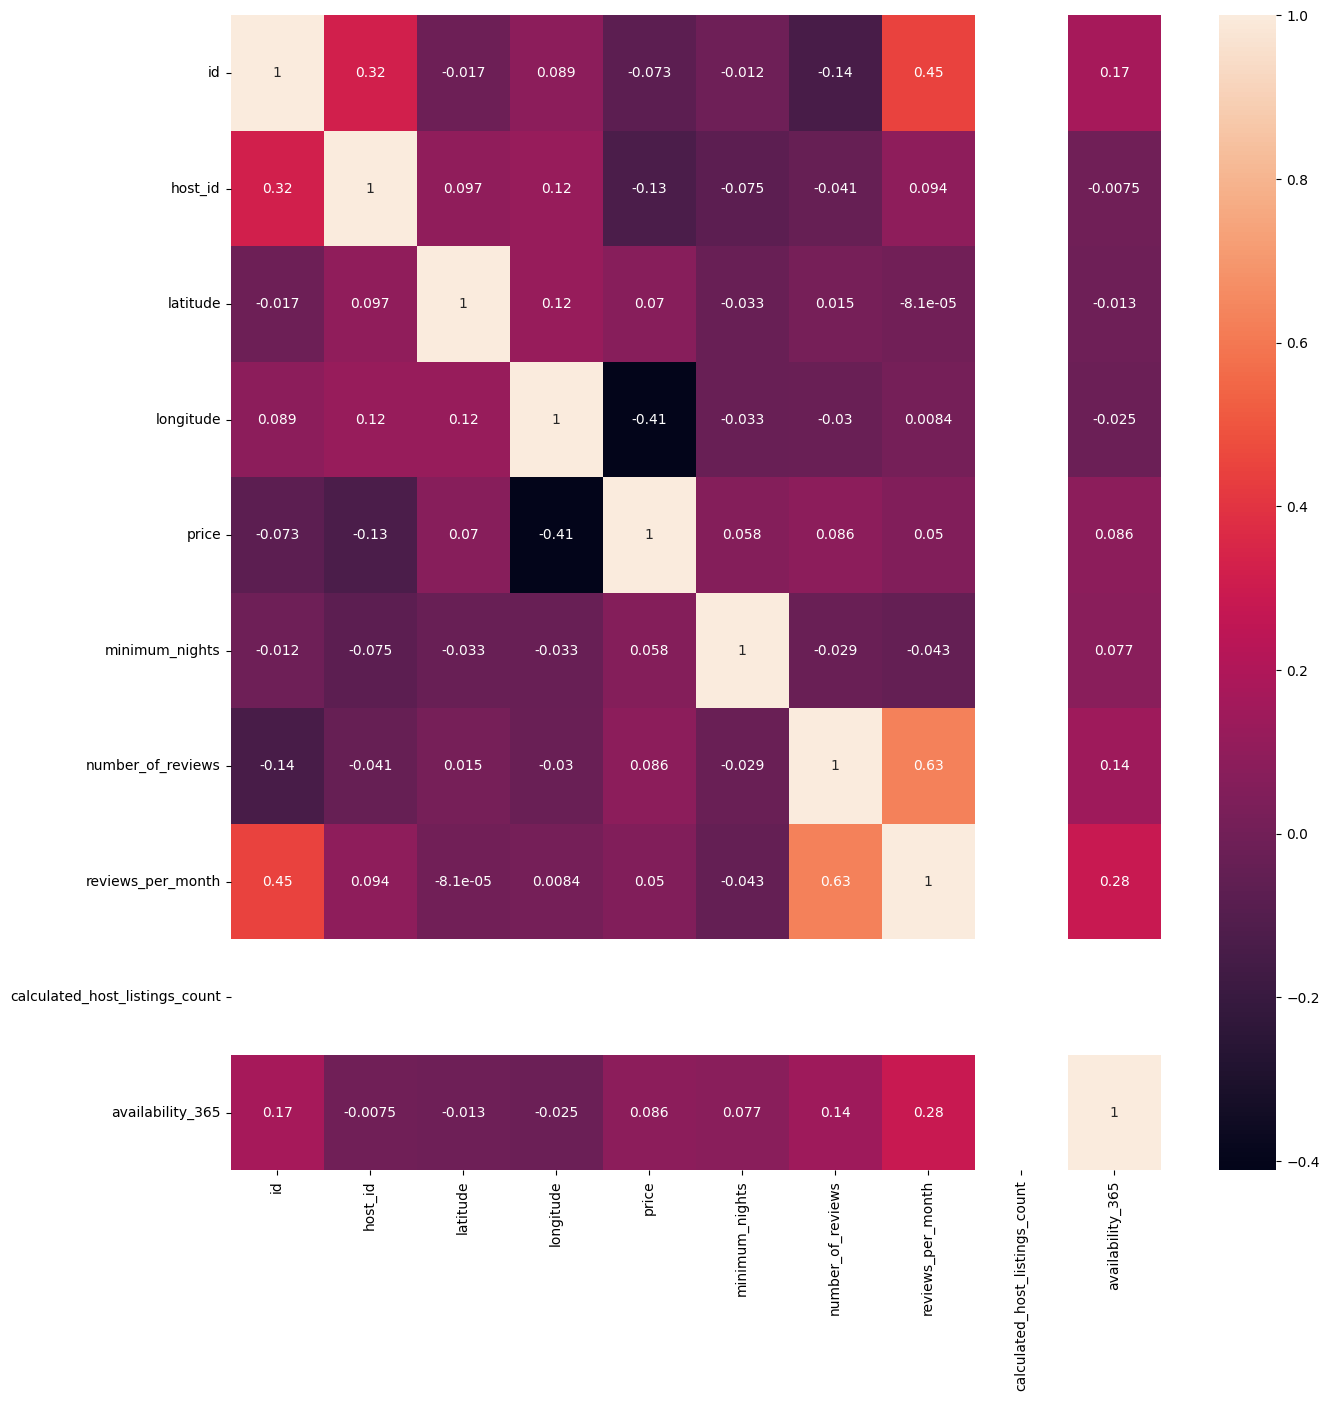

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

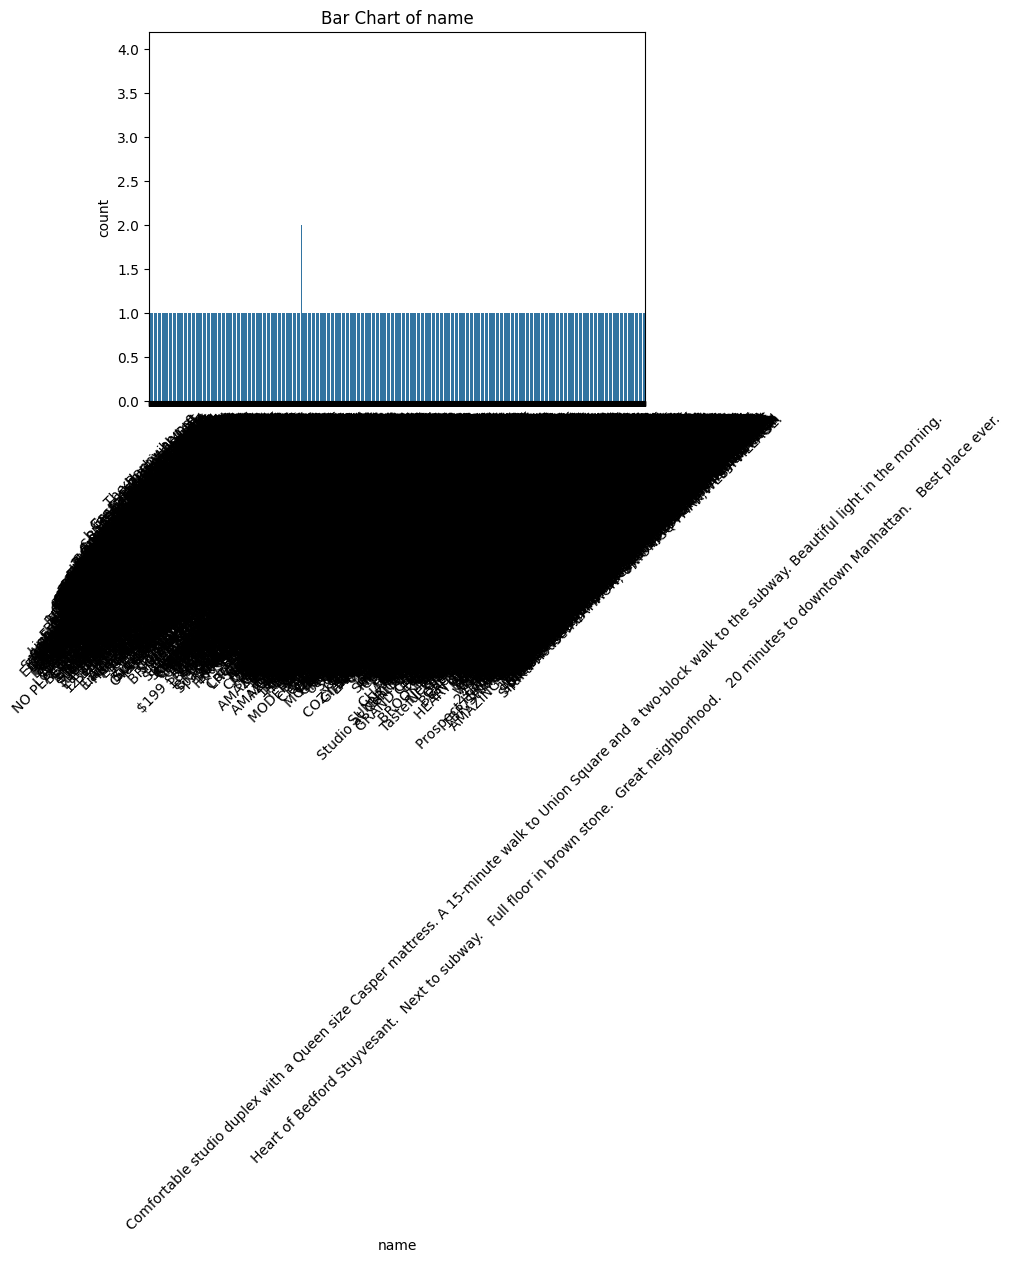

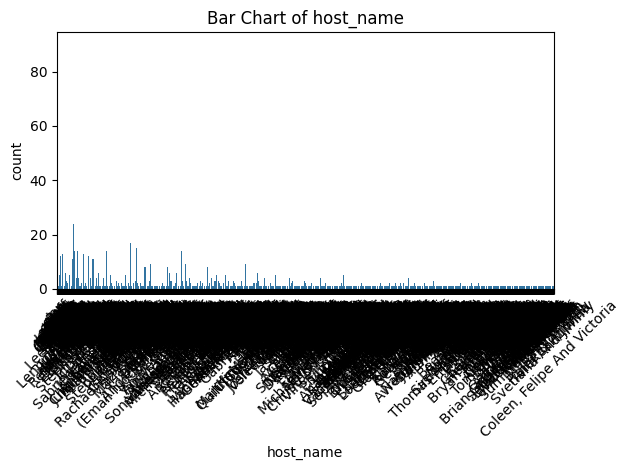

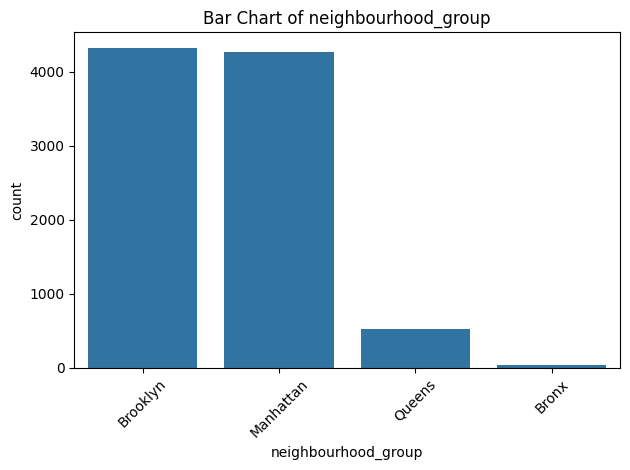

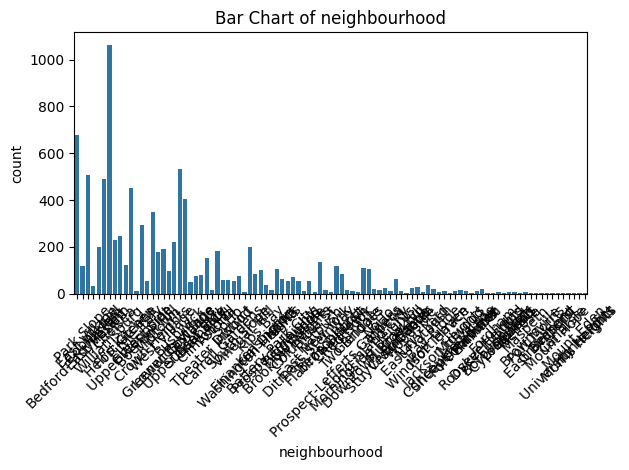

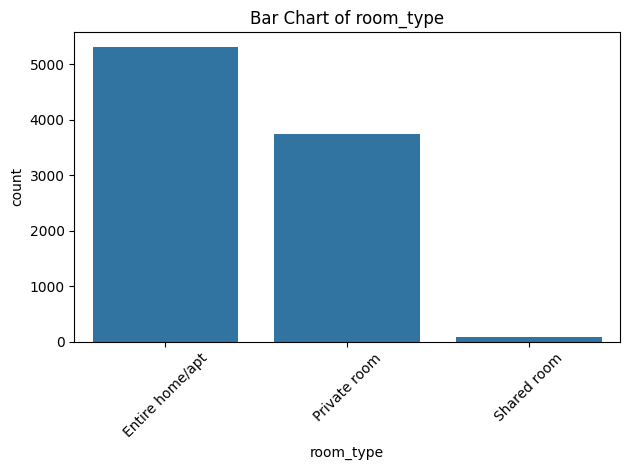

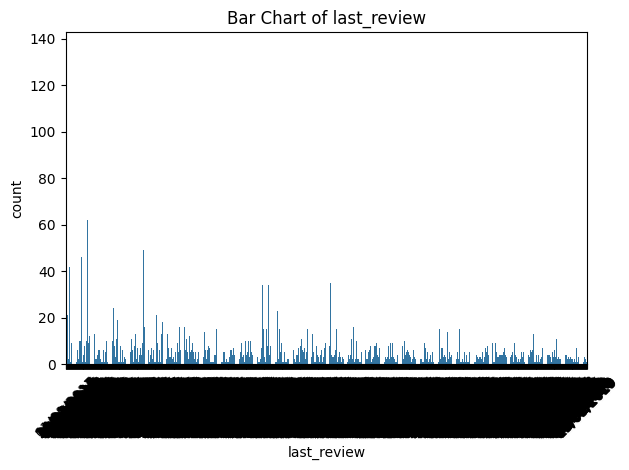

In [ ]:
# Bar charts for categorical variables
# Bar charts for categorical variables
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart of {col}')
    plt.tight_layout()
    plt.show()


**SUMMARY** **INSIGHTS**

# 📄 Airbnb Dataset Analysis Report

### ✅ 1. Data Overview
The Airbnb dataset contains multiple rows and columns with both **numerical** (e.g., price, reviews) and **categorical** (e.g., location, room type) features. It provides valuable insights into Airbnb listings.

---

### 🧹 2. Data Cleaning
- **Missing Values**: All columns were checked. No column had more than 50% missing data, so all were retained.
- **Duplicates**: Duplicate rows were identified and removed.
- **Outliers**: Outliers in numeric features were handled using the **Interquartile Range (IQR)** method.
- **Garbage Values**: Text columns were inspected for unusual or incorrect values.

---

### 🔍 3. Exploratory Data Analysis (EDA)
- **Descriptive Statistics**: Summary statistics were generated for both numeric and categorical columns to understand data distribution and central tendencies.
- **Text Columns**: Unique values and frequency counts were reviewed to detect any data issues.

---

### 📊 4. Data Visualization
- **Histograms**: Plotted for numeric features to show distribution, skewness, and spread.
- **Bar Charts**: Created for categorical features to understand the frequency of each category.
- **Correlation Heatmap**: Revealed relationships among numeric variables. Some features showed strong or weak correlations, which may guide future analysis or modeling.

---

### 📌 5. Key Insights
- The dataset is clean and ready for further analysis.
- Some numerical features are **right-skewed** and may need transformation.
- Certain categorical columns have many unique values and could be simplified or encoded.
- The correlation heatmap highlighted **important feature relationships**, helpful for modeling tasks like prediction or classification.


**TASK 2**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8942
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**TASK 3**

In [ ]:
# fraud_detection_system.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
# Load dataset
df = pd.read_csv("credit_card_fraud_dataset.csv")

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['TransactionType', 'Location']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Feature selection
X = df.drop(columns=['TransactionID', 'TransactionDate', 'IsFraud'])
y = df['IsFraud']


In [ ]:
# Handle imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Save model and encoders
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')



Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     19777
           1       0.92      0.97      0.94     19823

    accuracy                           0.94     39600
   macro avg       0.94      0.94      0.94     39600
weighted avg       0.94      0.94      0.94     39600



['label_encoders.pkl']

**TASK 4**

# Boston Housing Prices Analysis and Prediction
## Introduction
This notebook aims to provide insights and visualizations for the Boston housing prices dataset, clean the data, and apply several popular machine learning regression algorithms to predict housing prices. The performance of each model will be evaluated and compared.

## About The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per 10,000 dollars
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in 1000 dollars's

### Target Column
In this dataset, the **target column** (the column we aim to predict using the other features) is MEDV (Median value of owner-occupied homes in 1000 dollars's). The goal of using this dataset is typically to develop a model that can estimate housing prices based on various influencing factors (features).

## Data Loading and Initial Exploration
First, we will load the dataset and perform some initial exploration to understand its structure and contents.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('boston.csv')

# Display the first few rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.shape

(506, 14)

In [ ]:
# Check for missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Data Cleaning
Handling missing values and removing unnecessary columns. In this dataset, we decided to drop the CHAS and ZN columns based on their low correlation with the target variable and low feature importance.

In [ ]:
# Impute missing values with mean
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)
df.head()

<ipython-input-6-c465a1a8d5b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
<ipython-input-6-c465a1a8d5b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


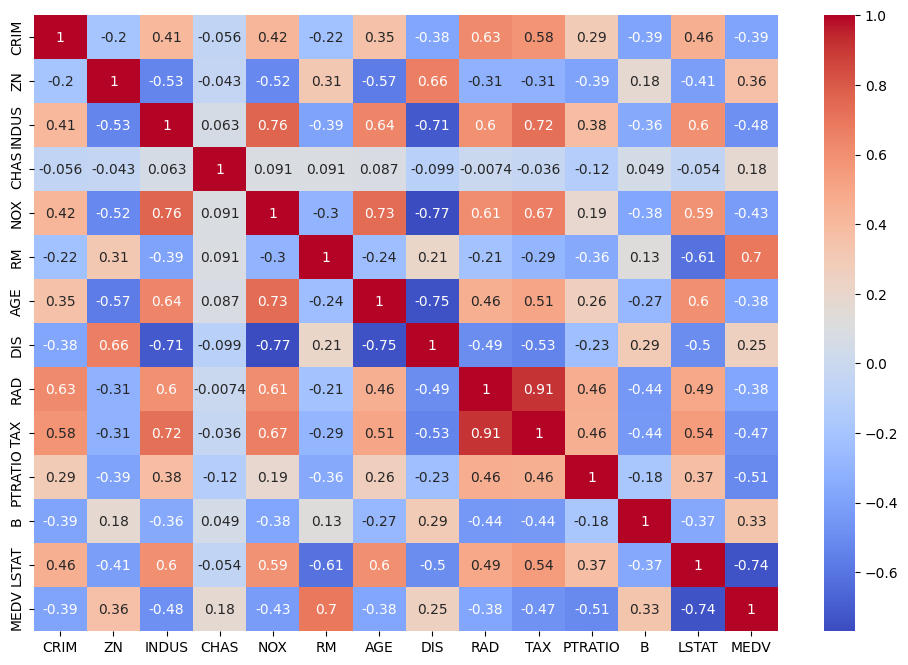

In [ ]:
# Analyzing the Impact of Dropping Columns "ZN" & "CHAS"
# Checking Correlations

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


    Feature  Importance
5        RM    0.410413
12    LSTAT    0.395962
7       DIS    0.065570
0      CRIM    0.040014
4       NOX    0.019053
10  PTRATIO    0.016651
9       TAX    0.014775
6       AGE    0.014269
11        B    0.011367
2     INDUS    0.006101
8       RAD    0.003792
3      CHAS    0.001038
1        ZN    0.000995


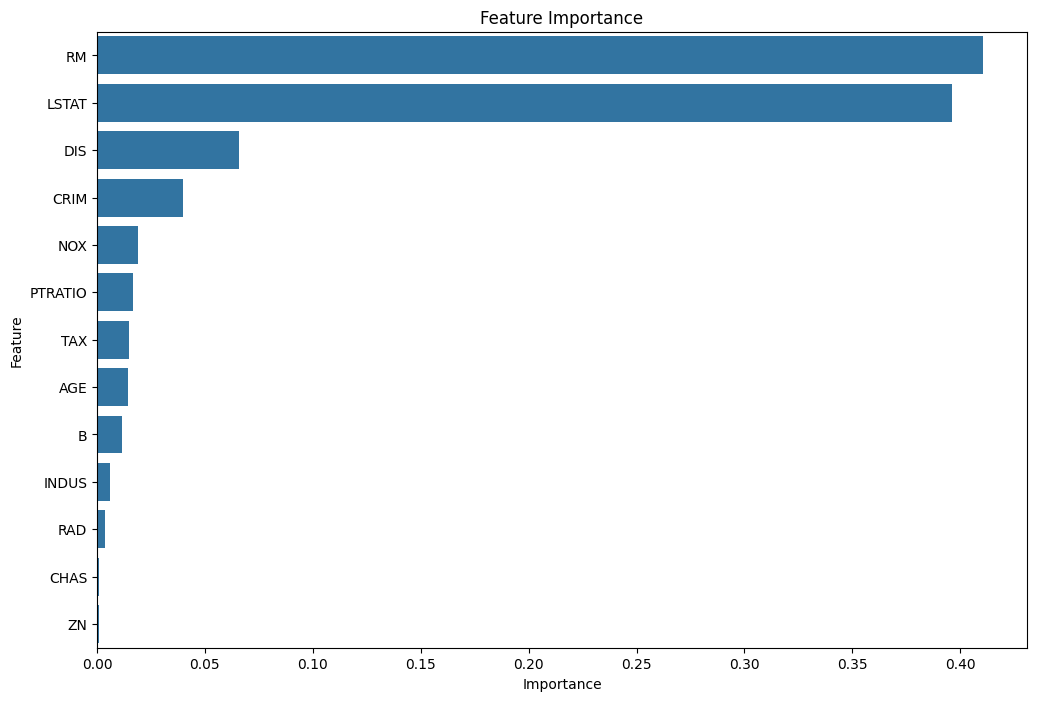

In [ ]:
# Analyzing the Impact of Dropping Columns "ZN" & "CHAS"
# feature importance
from sklearn.ensemble import RandomForestRegressor

# Prepare the data without dropping 'CHAS' and 'ZN'
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Fit a random forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Drop the columns 'CHAS' and 'ZN'
df = df.drop(columns=['CHAS', 'ZN'])

# Verify the columns are dropped
df.head()


,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Visualization
Visualizing the correlations and distributions in the dataset.

### Correlation Matrix
The correlation matrix helps us understand the relationships between different features and the target variable (MEDV).

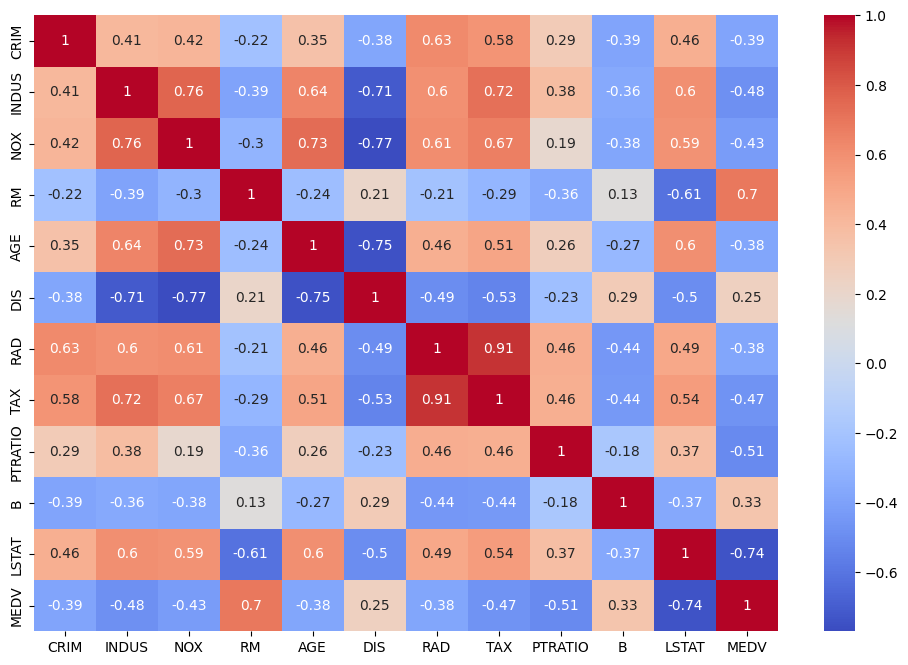

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Distribution of Prices (MEDV)
Visualizing the distribution of the target variable MEDV.

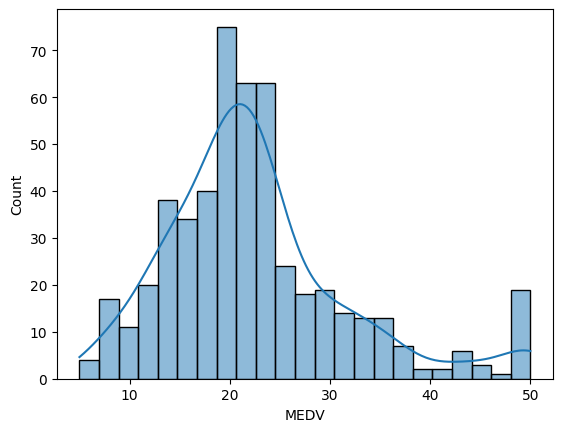

In [ ]:
sns.histplot(df['MEDV'], kde=True)
plt.show()


## Data Splitting
Splitting the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']  # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying Machine Learning Models
We will apply three regression algorithms to predict the MEDV values: Linear Regression, Random Forest Regression, and Support Vector Regression.

## Linear Regression
Linear Regression is a simple and interpretable algorithm that assumes a linear relationship between the input features and the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

## Random Forest Regression
Random Forest is an ensemble method that uses multiple decision trees to improve the predictive performance and control overfitting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

## Support Vector Regression (SVR)
Support Vector Regression attempts to find a hyperplane in an N-dimensional space that best fits the data, and it is particularly useful for high-dimensional spaces.

In [ ]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(x_train, y_train)
y_pred_svr = model_svr.predict(x_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
y_train_discrete = np.digitize(y_train, bins=np.histogram_bin_edges(y, bins=10))
y_test_discrete = np.digitize(y_test, bins=np.histogram_bin_edges(y, bins=10))

model_nb = GaussianNB()
model_nb.fit(x_train, y_train_discrete)
y_pred_nb_discrete = model_nb.predict(x_test)

In [ ]:
# Convert predicted categories back to a continuous format for comparison
# Using midpoints of bins
bins = np.histogram_bin_edges(y, bins=10)
bin_midpoints = (bins[:-1] + bins[1:]) / 2
# Clip values to be within the valid range of bin_midpoints
clipped_indices = np.clip(y_pred_nb_discrete - 1, 0, len(bin_midpoints) - 1)
y_pred_nb = bin_midpoints[clipped_indices]
mse_nb = mean_squared_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

## Evaluating the Models
Evaluating the performance of each model using Mean Squared Error (MSE) and R-squared (R2) metrics.

In [ ]:
def print_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')
print_metrics(y_test, y_pred_svr, 'Support Vector Regression')
print_metrics(y_test, y_pred_svr, 'Decision Tree Regressor')
print_metrics(y_test, y_pred_nb_discrete, 'Naive Bayes')

Linear Regression - MSE: 26.014877435340267, R2: 0.6452538473507317
Random Forest - MSE: 8.595539656862748, R2: 0.882788814562163
Support Vector Regression - MSE: 54.05821340585986, R2: 0.26284706616488984
Decision Tree Regressor - MSE: 54.05821340585986, R2: 0.26284706616488984
Naive Bayes - MSE: 354.28, R2: -3.8310612753397697


## Visualizing Predictions vs Actuals
Visualizing the predictions versus actual values for each model.

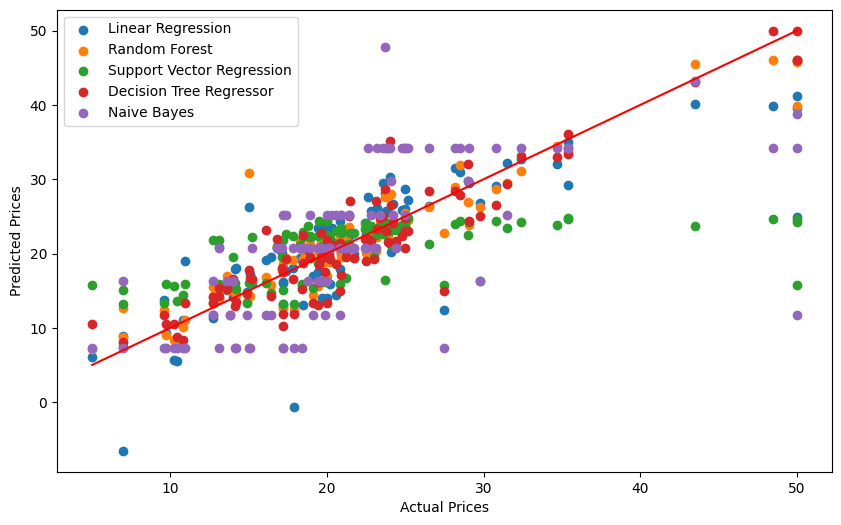

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_svr, label='Support Vector Regression')
plt.scatter(y_test, y_pred_dt, label='Decision Tree Regressor')
plt.scatter(y_test, y_pred_nb, label='Naive Bayes')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()